In [24]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt     
import seaborn as sns               
%matplotlib inline


# Telco Customer Churn : Exploratory Data Analysis

In [49]:
# Import the data
df = pd.read_csv(r'C:\Users\HP\Documents\Kaggle\Telco Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# view column and check if there's any null values
print(df.info())
print('==================')
print(df.describe()) # check basic statistical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see from above, the output is :

**A.** Mean Monthly charges is about 64.76<br>
**B.** The maximum tenure is 72 months with mean being about 32 months.<br>
**C.** 50% of customers stayed for 29 months tenure and were charged 70.3 per month

In [6]:
df.shape

(7043, 21)

### value_counts method to have a look at the distribution and proportion

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Sorting values by highest total charge

df.sort_values(by='TotalCharges', ascending=False).head()

In [15]:
df.sort_values(by=['Churn','TotalCharges'], ascending=[True, False]).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,9093-FPDLG,Female,0,No,No,11,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.20,999.9,No
3353,4536-PLEQY,Male,0,Yes,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
5598,6051-PTVNS,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
1935,7297-DVYGA,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.85,996.95,No


### Create basic chart for data visualization

<AxesSubplot:>

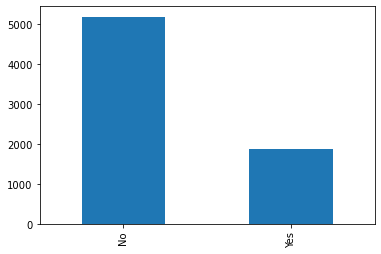

In [25]:
df['Churn'].value_counts().head().plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

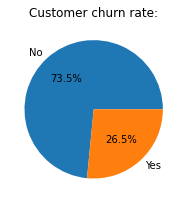

In [28]:
sizes = df['Churn'].value_counts(sort = True)
labels = np.unique(df.Churn)

#pie chart
plt.figure(figsize = (5,7))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show

In [50]:
# convert total charges data types to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
print("No. of missing values: \n",df.isnull().sum())

No. of missing values: 
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [51]:
# Drop CustomerId column because it's not needed
df.drop(['customerID'], axis = 1, inplace = True)

# Fill the missing values with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0.0)
print("Missing values now: \n", df.isnull().sum())

Missing values now: 
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [52]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


We want to see correlation between all data so we have to convert it in categorial features

In [53]:
df.gender = [1 if x == "Male" else 0 for x in df.gender]
for column in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    df[column] = [1 if x == "Yes" else 0 for x in df[column]]        
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [55]:
df.corr()['Churn'].sort_values()

tenure             -0.352229
TotalCharges       -0.198324
OnlineSecurity     -0.171226
TechSupport        -0.164674
Dependents         -0.164221
Partner            -0.150448
OnlineBackup       -0.082255
DeviceProtection   -0.066160
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.040102
StreamingMovies     0.061382
StreamingTV         0.063228
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

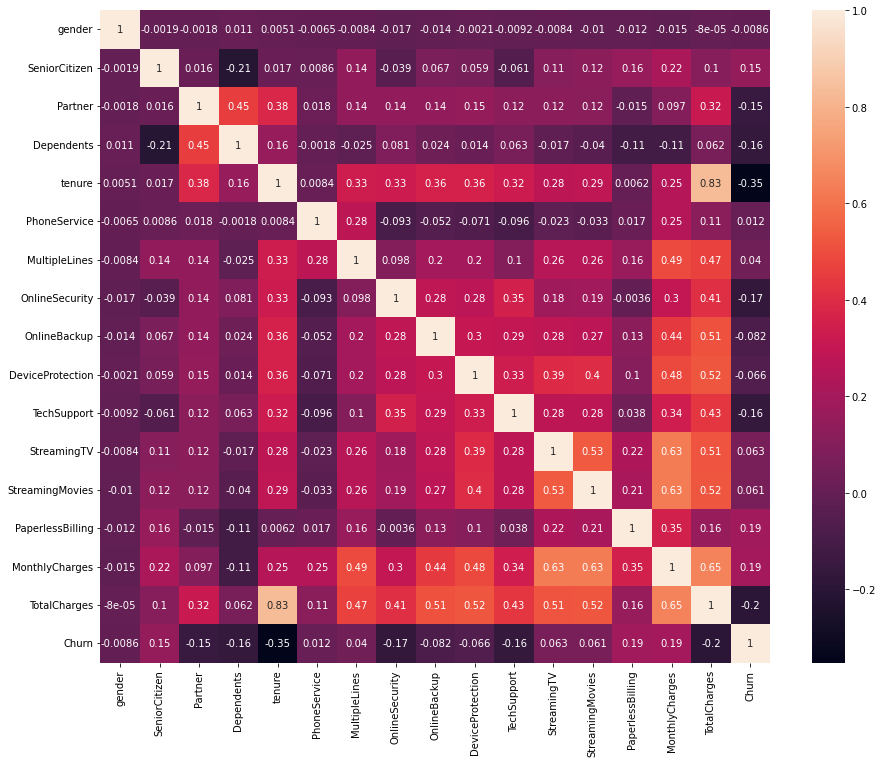

In [57]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot = True)
plt.show

From the heatmap above, we can see which features are most effective in causing customer churn. Correlation between variables shows how dependent variable changes due to an independent variable under consideration. A value close to +1 signifies strong positive correlation, while close to -1 shows strong negative effect. Correlation coeff. close to zero signifies weak relation between features.

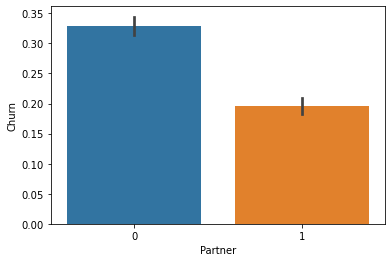

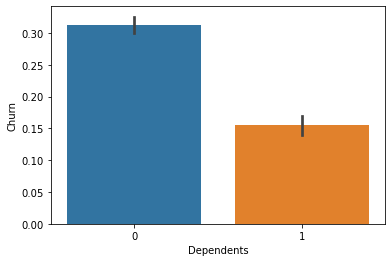

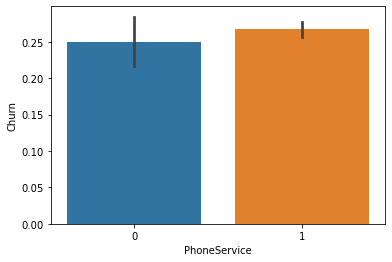

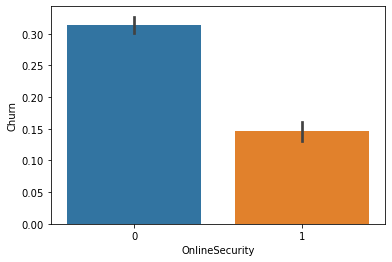

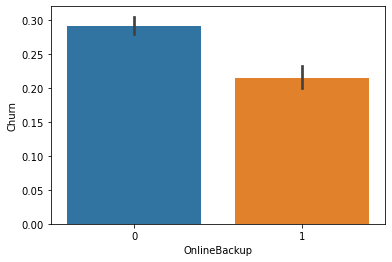

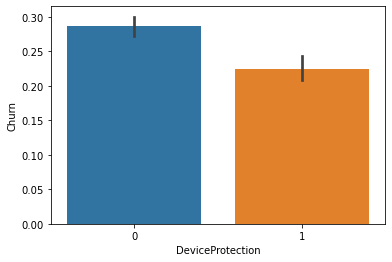

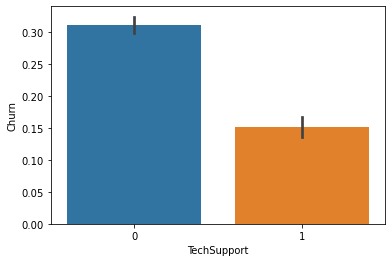

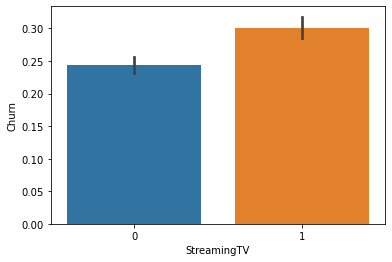

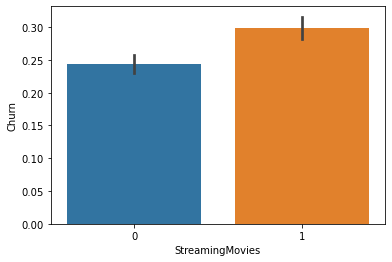

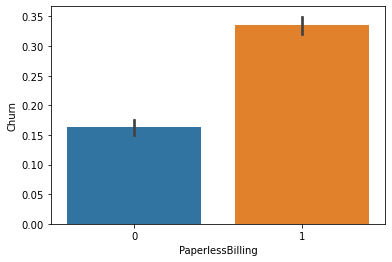

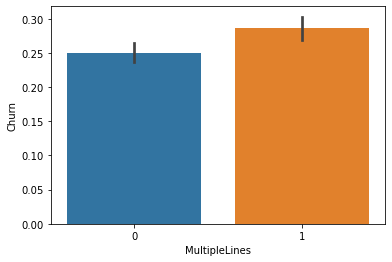

In [59]:
# Now let's generate bar plots w.r.t. to show Churn rate for each category
for var in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines'):
    sns.barplot(x = var, y = 'Churn', data = df)
    plt.show() 

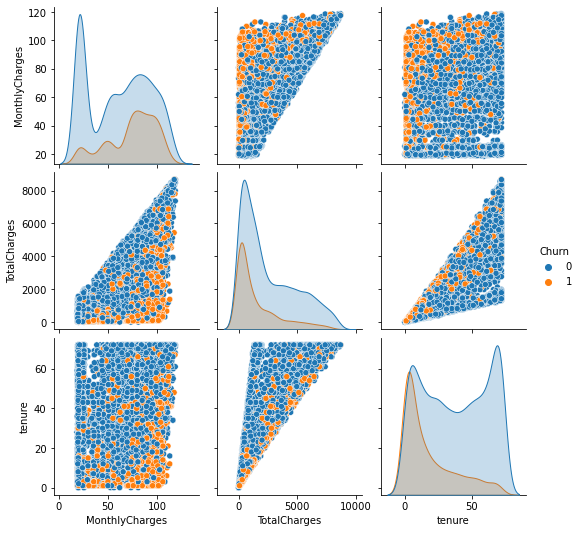

In [62]:
highcorr = ['MonthlyCharges','TotalCharges','tenure','Churn']
sns.pairplot(df[highcorr], hue = 'Churn')

### Insight from above output

Dashboard Tenure to Churn : https://public.tableau.com/views/TelecomCustomerCurn/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

**A.** Customer Phone Service, Streaming TV, Streaming Movies, Paperless Biling, Multiple Lines is categorical features that has higher customer churn rate then no churn. <br>
**B.** Customers with Month-to-month contract and Fibre optic Internet Service mostly going churn.<br>
**C.** Customers that churn showed a declining trend with increase in tenure period.<br>
**D.** Customers with Two-year contract and No Internet service have least churn rate.<br>

### Business Advice

Give the best service at the first month to maintain the customer for long period, the longer they stay, the more declining churn rate will be